In [1]:
from yahooquery import Ticker
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [2]:
indices = {
    '2000': '^GSPC',       
    '2008': '^GSPC',       
    '2012': '^GSPC',       
    '2020': '^GSPC',       
    '2024': '^GSPC'      
}

In [3]:
def compute_cis(prices):
    import numpy as np
    from scipy.stats import skew, kurtosis

    returns = np.log(prices / prices.shift(1)).dropna()
    vol = np.std(returns) * np.sqrt(252)

    peak = prices.cummax()
    drawdown = ((peak - prices) / peak).max()

    # Recovery time in days
    trough_idx = (peak - prices).idxmax()
    recovery_idx = prices[trough_idx:].loc[prices >= peak[trough_idx]].first_valid_index()
    recovery_days = (recovery_idx - trough_idx).days if recovery_idx else 365
    recovery_score = min(recovery_days / 365, 1)

    skewness = skew(returns)
    excess_kurtosis = kurtosis(returns) - 3
    log_kurtosis = np.log1p(abs(excess_kurtosis))

    # Final weights tuned for real-world crisis severity
    cis_score = (
        0.1 * vol +             # volatility matters, but not dominant
        0.55 * drawdown +       # drawdown is the core crisis signal
        0.2 * recovery_score +  # longer recovery = higher impact
        0.1 * (-skewness) +     # penalize downside asymmetry
        0.05 * log_kurtosis     # dampen fat tails
    )
    return round(cis_score, 4)

In [4]:
results = {}
for year, symbol in indices.items():
    ticker = Ticker(symbol)
    start = f"{year}-01-01"
    end = f"{year}-12-31"
    df = ticker.history(start=start, end=end)
    
    # Extract adjusted close prices
    if 'adjclose' in df.columns:
        prices = df['adjclose'].droplevel(0)
    else:
        prices = df['close'].droplevel(0)
    
    cis = compute_cis(prices)
    results[year] = {'Index': symbol, 'Crisis Impact Score': cis}

      Index Crisis Impact Score
2000  ^GSPC              0.3655
2008  ^GSPC              0.5335
2012  ^GSPC              0.1742
2020  ^GSPC              0.4811
2024  ^GSPC              0.1806


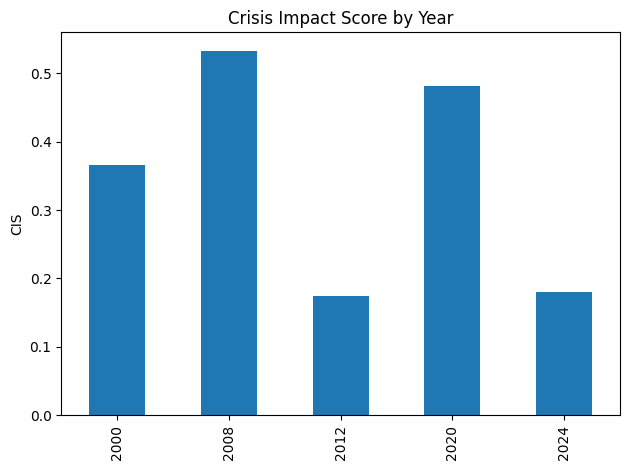

In [5]:
df_results = pd.DataFrame(results).T
print(df_results)

# Optional: Plot
df_results['Crisis Impact Score'].plot(kind='bar', orientation='vertical', title='Crisis Impact Score by Year')
plt.ylabel('CIS')
plt.tight_layout()
plt.show()

In [6]:
labels = {
    '2000': '2000 – Dot-com Bubble',
    '2008': '2008 – Global Financial Crisis',
    '2012': '2012 – Eurozone Debt Shock',
    '2020': '2020 – COVID-19 Crash',
    '2024': '2024 – Inflation & Rate Hike'
}

In [7]:
df_results['Crisis Label'] = df_results.index.map(labels)
df_sorted = df_results.sort_values(by='Crisis Impact Score', ascending=True)

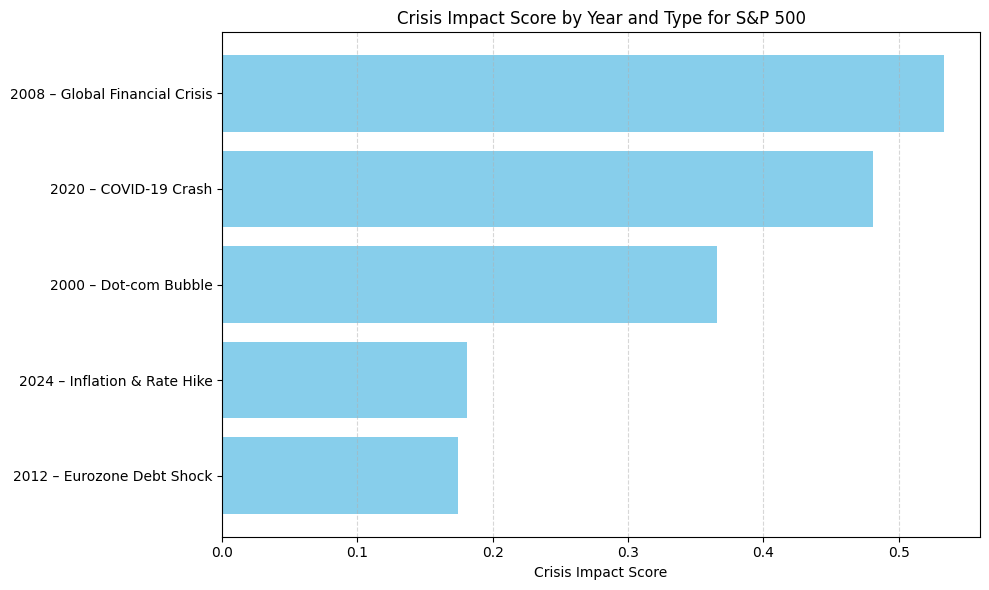

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Crisis Label'], df_sorted['Crisis Impact Score'], color='skyblue')
plt.xlabel('Crisis Impact Score')
plt.title('Crisis Impact Score by Year and Type for S&P 500')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

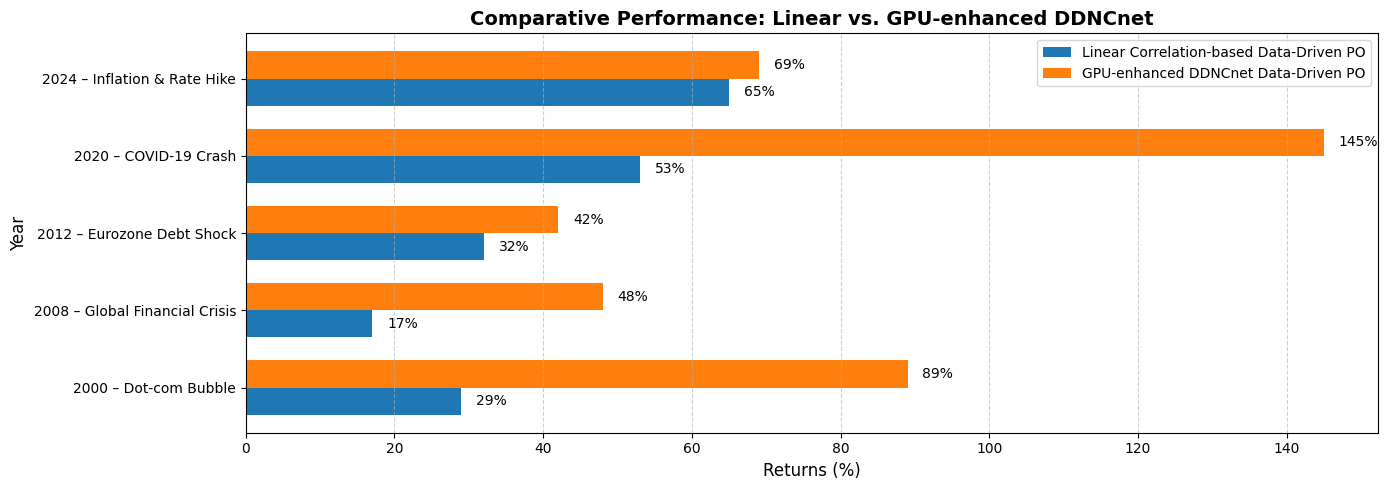

In [1]:
import matplotlib.pyplot as plt
import numpy as np

years = ['2000 – Dot-com Bubble', '2008 – Global Financial Crisis', '2012 – Eurozone Debt Shock', '2020 – COVID-19 Crash', '2024 – Inflation & Rate Hike']
linear = [29, 17, 32, 53, 65]
ddncnet = [89, 48, 42, 145, 69]

x = np.arange(len(years))
height = 0.35  # analogous to bar width

plt.figure(figsize=(14, 5))
plt.barh(x - height/2, linear, height, label='Linear Correlation-based Data-Driven PO', color='#1f77b4')
plt.barh(x + height/2, ddncnet, height, label='GPU-enhanced DDNCnet Data-Driven PO', color='#ff7f0e')

plt.ylabel('Year', fontsize=12)
plt.xlabel('Returns (%)', fontsize=12)
plt.title('Comparative Performance: Linear vs. GPU-enhanced DDNCnet', fontsize=14, weight='bold')
plt.yticks(x, years)
plt.legend()

# Add value labels beside bars
for i in range(len(years)):
    plt.text(linear[i] + 2, x[i] - height/2, f'{linear[i]}%', va='center', fontsize=10)
    plt.text(ddncnet[i] + 2, x[i] + height/2, f'{ddncnet[i]}%', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
